<a href="https://colab.research.google.com/github/JoshSilverb/mdst_nlp_2021/blob/master/Week0EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns


train = pd.read_csv("train.csv")
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
train['text'] = train['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
train.head()

,id,text,author
0,id26305,this process however afforded me no means of a...,EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,in his left hand was a gold snuff box from whi...,EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,finding nothing else not even gold the superin...,HPL


In [ ]:
eap = ' '.join(train[train['author'] == 'EAP']['text'].tolist()).split()
hpl = ' '.join(train[train['author'] == 'HPL']['text'].tolist()).split()
mws = ' '.join(train[train['author'] == 'MWS']['text'].tolist()).split()

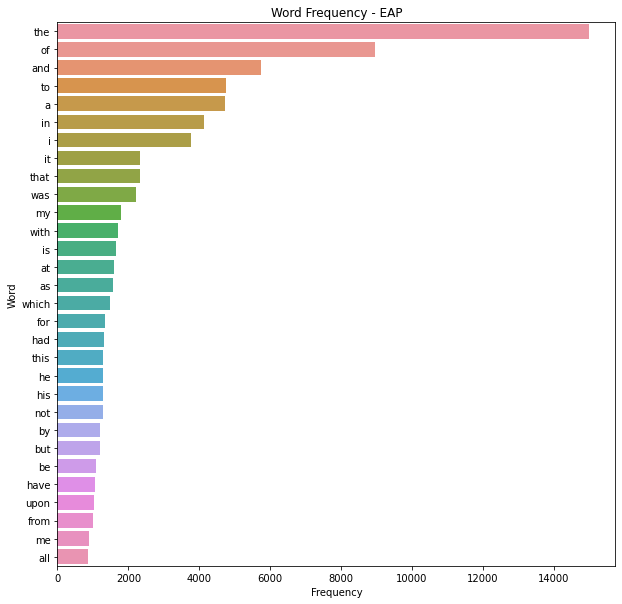

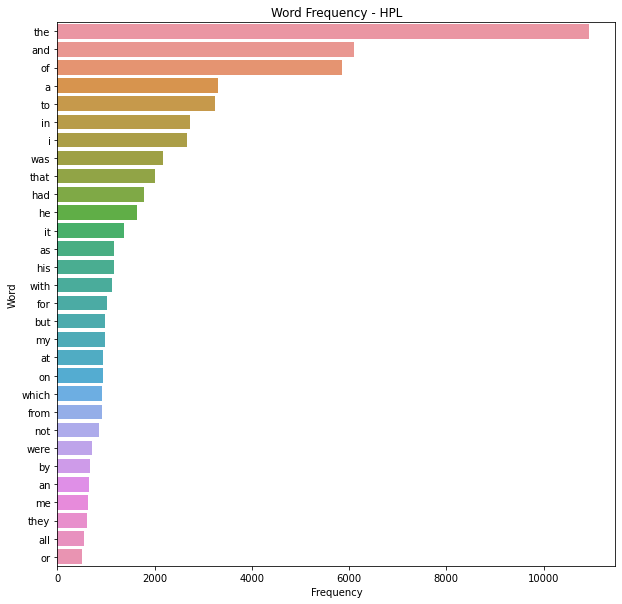

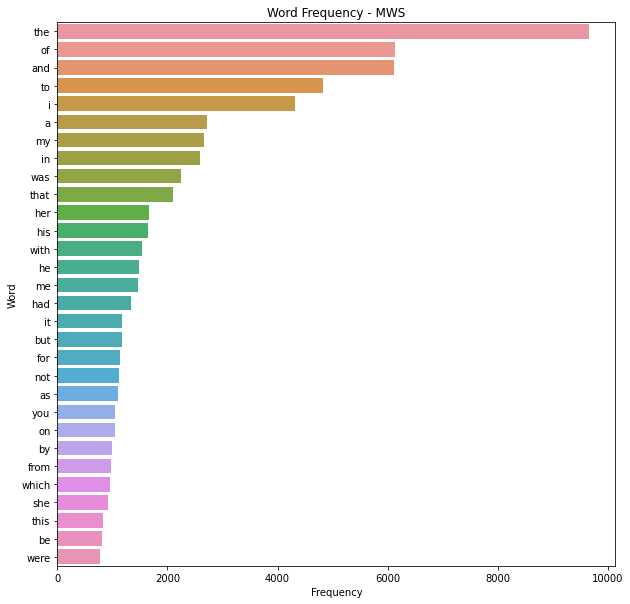

In [ ]:
for author, name in zip([eap, hpl, mws], ['EAP', 'HPL', 'MWS']):
  freq = dict(collections.Counter(author))
  df = pd.DataFrame(list(zip(freq.keys(), freq.values())), columns =['Word', 'Frequency'])
  df = df.sort_values(by=['Frequency'], ascending=False)
  plt.figure(figsize=(10, 10))
  sns.barplot(x='Frequency',y='Word', data=df.head(30))
  plt.title('Word Frequency - {}'.format(name))
  plt.show()

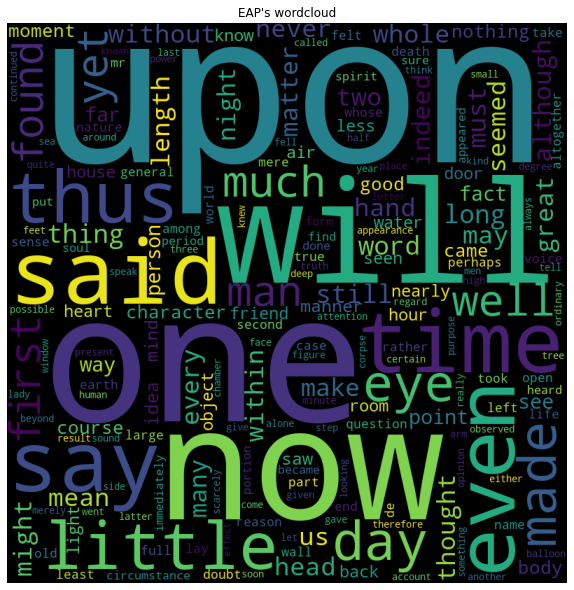

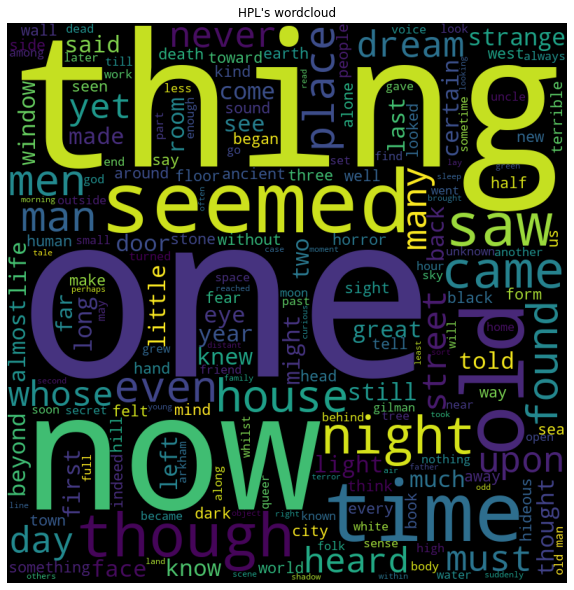

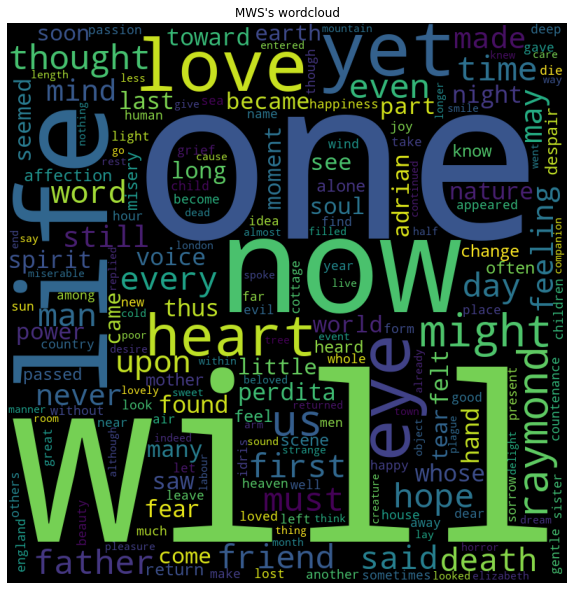

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
eap = ' '.join(train[train['author'] == 'EAP']['text'].tolist())
hpl = ' '.join(train[train['author'] == 'HPL']['text'].tolist())
mws = ' '.join(train[train['author'] == 'MWS']['text'].tolist())

EAPwordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(eap)
HPLwordcloud = WordCloud(width = 800, height = 800, 
  background_color ='black', 
  stopwords = stopwords, 
  min_font_size = 10).generate(hpl)

MWSwordcloud = WordCloud(width = 800, height = 800, 
    background_color ='black', 
    stopwords = stopwords, 
    min_font_size = 10).generate(mws)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(EAPwordcloud)
plt.title("EAP's wordcloud")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(HPLwordcloud)
plt.title("HPL's wordcloud")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(MWSwordcloud)
plt.title("MWS's wordcloud")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()